[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\eswar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eswar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\eswar\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\eswar\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eswar\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Top 10 words:
good: 279
taste: 193
fresh: 173
quality: 168
sweet: 124
bad: 102
great: 87
juicy: 79
buy: 66
fruit: 66

Named Entities:
Fresh Hygine Product - PERSON
Well Test - PERSON
Delicious - GPE
Colour - PERSON
Hard - ORGANIZATION
Quality - ORGANIZATION
Fresh - PERSON
Fruit - PERSON
Good - PERSON
Amazon - ORGANIZATION
Fresh Recieved - PERSON
Chemical - PERSON
Amazon Old Stuff - PERSON
Quality - GPE
Item - GPE
Good - PERSON
Fresh - PERSON
Shimla Apple - PERSON
Highly - PERSON
Superb - GPE
Crisp - PERSON
Perfectly - PERSON
Perfect - GPE
Super - GPE
Arrived - GPE
Waste - GPE
Dry - GPE
Spoiled - PERSON
Dont - GPE
Worst - PERSON
Dont - GPE
Delicious - GPE
Fruit - PERSON
Great - GPE
Chemical - GPE
Crisp - GPE
Terrible - GPE
Average - GPE
Too - PERSON
Value - GPE
Good Grapes - PERSON
Great - GPE
Good Very - ORGANIZATION
Eat - ORGANIZATION
Tasty - GPE
Taste - GPE
Average Was - PERSON
Verge - PERSON
Waste - ORGANIZATION
Will - PERSON
Absolute - PERSON
Super - PERSON
Best - PERSON
Fresh - GP

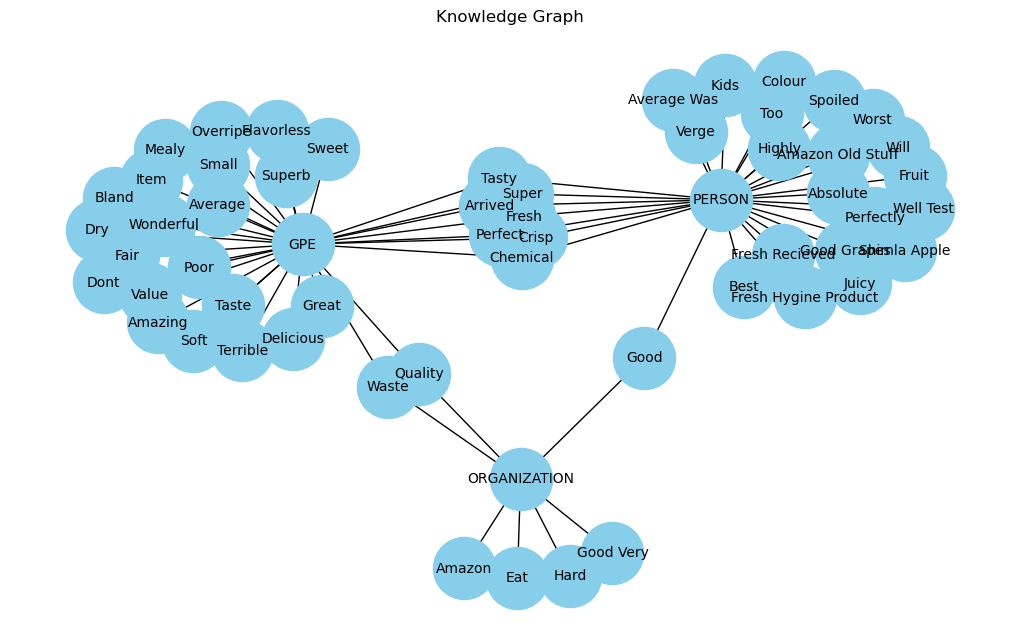

In [9]:
import pandas as pd
import nltk
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import ne_chunk, pos_tag

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')  # Download part-of-speech tagger

# Load the CSV file
csv_file =    'FDS_TotalDataSet.csv'
df = pd.read_csv(csv_file)

# Combine all reviews into a single string
# Assuming the column is named 'Review'
text_data = ' '.join(df['Comment'].astype(str).tolist())

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower())  # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Step 2: Named Entity Recognition (NER) using NLTK
print("\nNamed Entities:")
sentences = sent_tokenize(text_data)
entities = []

for sentence in sentences:
    tokens = word_tokenize(sentence)
    tagged_tokens = pos_tag(tokens)
    ne_tree = ne_chunk(tagged_tokens)

    for subtree in ne_tree:
        if hasattr(subtree, 'label'):
            entity_name = ' '.join([token for token, pos in subtree.leaves()])
            entity_label = subtree.label()
            entities.append((entity_name, entity_label))
            print(f"{entity_name} - {entity_label}")

# Step 3: Derive Knowledge Graph
edges = entities

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 4: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()


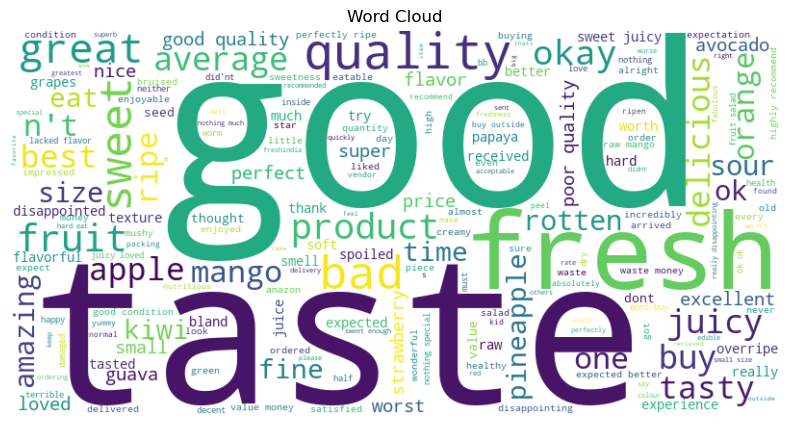

In [11]:

from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400,
background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()



In [17]:
# Code for N-gram analysis
from nltk import ngrams
import collections

# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
    print(f"{' '.join(bigram)}: {count}")

# Code for TF-IDF vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Using the 'Review' column for TF-IDF analysis
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Comment'])  # Make sure to reference 'Review' column

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())



Top 10 Bigrams:
good quality: 27
taste good: 27
poor quality: 24
sweet juicy: 21
value money: 16
good taste: 16
fresh juicy: 14
fresh sweet: 14
waste money: 13
perfectly ripe: 13

TF-IDF Matrix:
    10  250  2days  350gms  3days  3rd   50  500  500gm  absolute  ...  wrote  \
0  0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0    0.0       0.0  ...    0.0   
1  0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0    0.0       0.0  ...    0.0   
2  0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0    0.0       0.0  ...    0.0   
3  0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0    0.0       0.0  ...    0.0   
4  0.0  0.0    0.0     0.0    0.0  0.0  0.0  0.0    0.0       0.0  ...    0.0   

   wsate   wt  wud   wv  yak  yellow  yellowing  yummy  zing  
0    0.0  0.0  0.0  0.0  0.0     0.0        0.0    0.0   0.0  
1    0.0  0.0  0.0  0.0  0.0     0.0        0.0    0.0   0.0  
2    0.0  0.0  0.0  0.0  0.0     0.0        0.0    0.0   0.0  
3    0.0  0.0  0.0  0.0  0.0     0.0        0.0    0.0   0.0  
4 